In [1]:
#본 코드는 6개의 질문중 택 1의 경우 한명의 학생데이터와 1000명의 학생 데이터를 비교하여 상, 중, 하를 구분하는 코드임. 
#Globe embeddings를 적용할거임!

In [1]:
import numpy as np
import gensim
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize
import multiprocessing
import os
from pathlib import Path
import io
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
from pandas import DataFrame as df
from mpld3 import plugins, fig_to_html, save_html, fig_to_dict
from tqdm import tqdm
import numpy as np
import json
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# synonym: 동의어
# antonym: 반의어
# hypernym: 상의어
# hyponym: 하위어

# 여기서는 synonym 만 추출하여 추가 분석에 반영함
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kimkwangil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kimkwangil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kimkwangil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
input_text = """Bloomington Normal is almost laughably cliché for a midwestern city. Vast swathes of corn envelop winding roads and the heady smell of BBQ smoke pervades the countryside every summer. Yet, underlying the trite norms of Normal is the prescriptive force of tradition—the expectation to fulfill my role as a female Filipino by playing Debussy in the yearly piano festival and enrolling in multivariable calculus instead of political philosophy.So when I discovered the technical demand of bebop, the triplet groove, and the intricacies of chordal harmony after ten years of grueling classical piano, I was fascinated by the music's novelty. Jazz guitar was not only evocative and creative, but also strangely liberating. I began to explore different pedagogical methods, transcribe solos from the greats, and experiment with various approaches until my own unique sound began to develop. And, although I did not know what would be the 'best' route for me to follow as a musician, the freedom to forge whatever path I felt was right seemed to be exactly what I needed; there were no expectations for me to continue in any particular way—only the way that suited my own desires.While journeying this trail, I found myself at Interlochen Arts Camp the summer before my junior year. Never before had I been immersed in an environment so conducive to musical growth: I was surrounded by people intensely passionate about pursuing all kinds of art with no regard for ideas of what art 'should' be. I knew immediately that this would be a perfect opportunity to cultivate my sound, unbounded by the limits of confining tradition. On the first day of camp, I found that my peer guitarist in big band was another Filipino girl from Illinois. Until that moment, my endeavors in jazz guitar had been a solitary effort; I had no one with whom to collaborate and no one against whom I could compare myself, much less someone from a background mirroring my own. I was eager to play with her, but while I quickly recognized a slew of differences between us—different heights, guitars, and even playing styles—others seemed to have trouble making that distinction during performances. Some even went as far as calling me 'other-Francesca.' Thus, amidst the glittering lakes and musky pine needles of Interlochen, I once again confronted Bloomington's frustrating expectations.After being mistaken for her several times, I could not help but view Francesca as a standard of what the 'female Filipino jazz guitarist' should embody. Her improvisatory language, comping style and even personal qualities loomed above me as something I had to live up to. Nevertheless, as Francesca and I continued to play together, it was not long before we connected through our creative pursuit. In time, I learned to draw inspiration from her instead of feeling pressured to follow whatever precedent I thought she set. I found that I grew because of, rather than in spite of, her presence; I could find solace in our similarities and even a sense of comfort in an unfamiliar environment without being trapped by expectation. Though the pressure to conform was still present—and will likely remain present in my life no matter what genre I'm playing or what pursuits I engage in—I learned to eschew its corrosive influence and enjoy the rewards that it brings. While my encounter with Francesca at first sparked a feeling of pressure to conform in a setting where I never thought I would feel its presence, it also carried the warmth of finding someone with whom I could connect. Like the admittedly trite conditions of my hometown, the resemblances between us provided comfort to me through their familiarity. I ultimately found that I can embrace this warmth while still rejecting the pressure to succumb to expectations, and that, in the careful balance between these elements, I can grow in a way that feels both like discove"""


## 1000명의 학셍 에세이 JSON으로 불러오기

In [3]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import json
import pandas as pd
import sys

with open('personal_statement_980_fin.json','r') as json_file :
    json_data = json.load(json_file)

In [4]:
#1000명의 학생 데이터를 추출
st_data_txt = json.dumps(json_data)
st_data_txt

'{"schema": {"fields": [{"name": "index", "type": "integer"}, {"name": "new_personal_statement", "type": "string"}], "primaryKey": ["index"], "pandas_version": "0.20.0"}, "data": [{"index": 0, "new_personal_statement": " In my life and family, I have always felt in the middle between two warring halves of my identity: my mother and my father. My parents have been divorced for five years and have been at war ever since. I have always been in the middle between two people I love the most who cannot manage to love each other. While I move between the two houses, shuffling back and forth by court order, I never feel at home in either house, with either parent, or in either half of my identity; I can float back and forth but never touch the ground. My mom is Danish and her entire family still lives in Denmark. My dad is Native American and is a Native American history professor. I carry both of my parents\' identities: Danish and Native. An entire ocean has always separated the two halves o

In [5]:
######################
##### QUESTION 1 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고
qst_one_words_list = ['identity', 'background', 'interest', 'talent', 'meaningful','belief', 'explore', 'develop',
                    'realize', 'unique', 'passion', 'different', 'culture', 'sex', 'gender', 'religion', 
                    'profession', 'major', 'ethnic', 'disability', 'excel', 'standout', 'diversity',
                    'acculturation','alone','arouse','backdrop','background','belief','break','concern','cultural',
                    'culture','develop','different','disability','diverseness','diversity','endowment','ethnic','evolve',
                    'excel','explicate','explore','gain','gender','grow','heat','heathen','identity','impression','interest',
                    'love','major','mania','meaningful','modernize','originate','passion','pastime','polish','profession',
                    'rage','realize','recognize','religion','research','sake','setting','sex','singular','talent','train',
                    'understand','unique','unlike']        

In [6]:
######################
##### QUESTION 2 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고, WORDNET에서 유사단어 추출하여 적용완료!
qst_two_words_list = ['obstacle', 'challenge', 'setback', 'failure', 'difficulty', 'despair', 'defeat', 'hindrance', 'impediment', 
                        'misfortune', 'trouble', 'handicap', 'stumble', 'hurdle','bankruptcy',
                        'challenge', 'defeat', 'despair', 'difficulty', 'disability', 'disable', 'disturb', 'failure', 'frustration',
                        'fuss', 'handicap', 'hindrance', 'hurdle', 'kill', 'lurch', 'misfortune', 'obstacle', 'obstruction', 'perturb',
                        'reverse', 'stumble', 'trip', 'trouble', 'vault', 'worry']

In [7]:
######################
##### QUESTION 3 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고, WORDNET에서 유사단어 추출하여 적용완료!
qst_tree_words_list = ['idea', 'belief', 'question', 'thinking', 'prompted', 'outcome', 'challenge', 'defy', 'realize', 
                        'enlighten', 'philosophy', 'religion', 'conviction', 'believe', 'thoughts', 'reason', 'logic', 'value', 
                        'conscience', 'ethic', 'right', 'justice', 'dare', 'concept', 'existing', 'inspire', 'confront', 'oppose', 
                        'conflict', 'against','argue', 'battle', 'belief', 'believe', 'cause', 'challenge', 'cheer', 'clear', 'concept', 'conflict',
                        'confront', 'conscience', 'consequence', 'conviction', 'correct', 'correctly', 'dare', 'defy', 'dispute', 'doctrine',
                        'doubt', 'enlighten', 'estimate', 'ethic', 'exist', 'existent', 'existing', 'fight', 'gain', 'good', 'idea', 'impression',
                        'inhale', 'inspire', 'intelligent', 'intend', 'interrogate', 'interview', 'judge', 'justice', 'justly', 'logic', 'measure',
                        'mighty', 'mind', 'motion','motivate', 'opinion', 'oppose', 'philosophy', 'pit', 'prize', 'prompt', 'proper', 'properly',
                        'question', 'r', 'rate', 'rationality', 'react', 'realize', 'reason', 'recognize', 'religion', 'remember', 'respect', 'result',
                        'revolutionize', 'right', 'theme', 'think', 'thinking', 'thought', 'understand', 'value', 'veracious', 'wonder' ]

In [8]:
######################
##### QUESTION 4 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고, WORDNET에서 유사단어 추출하여 적용완료!
qst_four_words_list = ['problem', 'solve', 'problem-solving', 'problem solving', 'intellectual', 'research','ethical dilemma', 'personal',
                        'significance', 'solution', 'identify','challenge', 'question', 'dilemma', 'dispute', 'answer', 'clarify', 
                        'figure out', 'work out', 'fix', 'conclude', 'realize', 'discover','answer',
                        'cerebral', 'challenge', 'clarify', 'clear', 'conclude', 'cook', 'detect', 'dilemma', 'discover', 'dispute',
                        'doubt', 'fasten', 'fix', 'fixate', 'gain', 'identify', 'inquiry', 'intellectual', 'interrogate', 'interview',
                        'learn', 'localization', 'meaning', 'motion', 'name', 'personal', 'problem', 'quarrel', 'question', 'realize',
                        'reason', 'recognize', 'repair', 'research', 'resolve', 'significance', 'situate', 'solution', 'solve', 'specify',
                        'sterilize', 'suffice', 'trouble', 'understand', 'unwrap', 'wonder']

In [9]:
######################
##### QUESTION 5 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고, WORDNET에서 유사단어 추출하여 적용완료!
qst_five_words_list = ['accomplishment', 'event', 'realization', 'spark', 'growth', 'understanding', 'myself', 'others'
                        'realization', 'realize', 'accomplish', 'event', 'incident', 'happening', 'understanding', 'insight', 'insightful', 'mature', 'maturity',
                        'growth', 'enlightenment', 'enlighten', 'perspective', 'empathize', 'empathy', 'sympathize', 'sympathy', 'appreciate',
                        'acknowledge', 'respect', 'humble','accomplishment', 'achieve', 'acknowledge', 'admit', 'adulthood', 'agreement', 'appreciate',
                        'base', 'clear', 'commiserate', 'consequence', 'deference', 'discharge', 'emergence', 'empathy', 'enlighten', 'enlightenment', 'esteem',
                        'event', 'find', 'fledged', 'flicker', 'gain', 'growth', 'happen', 'happening', 'humble', 'humiliate', 'incident', 'incidental', 'increase',
                        'insight', 'insightful', 'mature', 'maturity', 'nirvana', 'notice', 'obedience', 'penetration', 'perspective', 'position', 'prize', 'realization',
                        'realize', 'reason', 'recognize', 'regard', 'respect', 'ripe', 'ripen', 'senesce', 'skill', 'spark', 'sparkle', 'suppurate', 'sympathize',
                        'sympathy', 'trip', 'understand', 'understanding']

In [10]:
######################
##### QUESTION 6 #####
######################
#표현하는 단어들을 리스트에 넣어서 필터로 만들고, WORDNET에서 유사단어 추출하여 적용완료!
qst_six_words_list = ['topic', 'idea', 'concept', 'engaging', 'captivate', 'learn'
                    'learn', 'research', 'subject', 'mentor', 'teacher', 'professor', 'inspiration', 'study', 'fascinate', 'engross', 'discover', 'find',
                    'theory', 'thought', 'think', 'mesmerize', 'delve', 'inquiry', 'inquire', 'question', 'inquisitive', 'investigate',
                    'explore', 'absorb', 'analyze', 'ask', 'betroth', 'capable', 'capture', 'cogitation', 'concept', 'detect', 'determine',
                    'dig', 'discipline','discover', 'discovery', 'doubt', 'engage', 'engaging', 'estimate', 'explore', 'fascinate', 'find', 'hire', 'hypnotize',
                    'hypothesis', 'idea', 'identify', 'inhalation', 'inquiry', 'inquisitive', 'inspiration', 'intend', 'interrogate', 'interview', 'intrigue',
                    'investigate', 'learn', 'lease', 'magnetize', 'mentor', 'mind', 'motion', 'national', 'opinion', 'professor', 'prosecute', 'question',
                    'receive', 'recover', 'remember', 'report', 'research', 'rule', 'sketch', 'steep', 'study', 'subject', 'subjugate', 'submit', 'survey',
                    'teacher', 'theme', 'theory', 'think', 'thinking', 'thought', 'topic', 'unwrap', 'witness', 'wonder']

In [11]:
#text : 입력 에세이
#question_num_list : 선택한 질문과 연관된 단어 리스트

def sim_words_quesiton(text,question_num_list):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수

    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)

    #모델 설계 완료

    ######################
    ##### QUESTION 1 ~6 ## 관련 단어는 다른 함수에서 처리하여 적용할 것!!  문항 1~6번을 선택했을 경우 이하 코드 계산(이것은 클래스로 선언)
    ######################
        
    ####문장에 list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.

    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in question_num_list:
            if k == j:
                filtered_chr_text.append(j)

    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.

    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인

    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i,topn=50) #모델적용

    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된  표현 총 수

    result_char_ratio = round(char_total_count/total_words * 100, 2)

    import pandas as pd

    df_conf_words = pd.DataFrame(ext_sim_words_key, columns=['words','values']) #데이터프레임으로 변환
    df_r = df_conf_words['words'] #words 컬럼 값 추출
    ext_sim_words_key = df_r.values.tolist() # 유사단어 추출

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return ext_sim_words_key


## QUESTION 1~6 중 선택한 질문에 따라서 작동하도록(if ~)

In [12]:
ques_oneTosix='ques_one' # 1 번 문항을 선택하고 에세이를 입력했을 경우. 입력한 에세이의 연관어 추출
#추출 결과를 1000명의 에세이와 비교하여 분석해보자

#ques_oneTosix=[ques_one, ques_two, ques_three, ques_four, ques_five, ques_six]


if 'ques_one' == ques_oneTosix: #선택한 질문과 같으면
    
    result_ques_one = sim_words_quesiton(input_text, qst_one_words_list) #입력한 에세이에 관하여 관련단어를 추출을 시작하라
    print("result_ques_one :", result_ques_one)
    
elif 'ques_two' == ques_oneTosix:
    
    sim_words_quesiton(input_text, qst_two_words_list)
    
    
elif 'ques_three' == ques_oneTosix:
    
    sim_words_quesiton(input_text, qst_three_words_list)
    
    
elif 'ques_four' == ques_oneTosix:
    
    sim_words_quesiton(input_text, qst_four_words_list)
    
    
elif 'ques_five' == ques_oneTosix:
    
    sim_words_quesiton(input_text, qst_five_words_list)
    
    
elif 'ques_six' == ques_oneTosix:
    
    sim_words_quesiton(input_text, qst_six_words_list)
    
    
else:
    print("not running..")
    pass

result_ques_one : ['heights', 'guitars', 'explore', 'differences', 'pedagogical', 'methods', 'slew', 'transcribe', 'solos', 'us', 'began', 'styles', 'recognized', 'provided', 'familiarity', 'greats', 'their', 'improvisatory', 'language', 'others', 'resemblances', 'some', 'comping', 'experiment', 'develop', 'style', 'between', 'quickly', 'hometown', 'personal', 'qualities', 'various', 'up', 'thus', 'went', 'even', 'loomed', 'performances', 'other', 'approaches', 'conditions', 'unique', 'live', 'vast', 'amidst', 'have', 'far', 'during', 'above', 'something']


/Users/kimkwangil/opt/anaconda3/envs/py37pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


In [24]:
##### 1번 문항에 해당하는 1000명의 학생 에세이 분석결과 ####
# 유사단어를 문장에서 추출하여 반환한다.
# st_data_txt >> 1000명의 에세이이다.
# qst_one_words_list >>> 1번재 질문을 선택했을 경우다.
que_no_one_sim_words_ratio_result = sim_words_quesiton(st_data_txt, qst_one_words_list)
quet_numb_len = len(que_no_one_sim_words_ratio_result)
print (quet_numb_len)
que_no_one_sim_words_ratio_result

50


/Users/kimkwangil/opt/anaconda3/envs/py37pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


['melodious',
 'heritage',
 'circumspection',
 'enlightenments',
 'consulate',
 'generational',
 'peculiarity',
 'persons',
 'accord',
 'barriers',
 'differences',
 'backgrounds',
 'thatmy',
 'moretraditional',
 'guarantees',
 'uninhibited',
 'behavioral',
 'fracas',
 'advantageous',
 'accommodating',
 'inferiority',
 'confucianist',
 'differing',
 'heterogeneous',
 'colonization',
 'authorities',
 'divider',
 'meto',
 'egyptian',
 'spanning',
 'bureaucratic',
 'combination_of',
 'socioeconomic',
 'more_comfortable',
 'where',
 'every_aspect',
 'inhibition',
 'traditions',
 'customs',
 'everyday_life',
 'internalized',
 'many_different',
 'cultural_identity',
 'different_cultures',
 'imbalances',
 'withstanding',
 'enabled_me',
 'background',
 'an_integral',
 'exclusivity']

In [14]:
# 위 결과(학생에세이분석결과)를 하나씩 꺼내서 1000명에세이 분석결과와 Doc2Vec로 개별 비교한다.
# 분석하기 위하여 입력데이터 전처리  예 ) ['학생데이터리스트중 1개', '나머지는 1000명의 데이터리스트']
# 6번 처리해야 하리때문에 함수로 변환적용할것!!!!
import numpy as np

input_data_preprocessed = []
for std_keyword in result_ques_one:# 위 결과(학생에세이분석결과)를 하나씩 꺼내서 
    input_data_preprocessed.append(std_keyword) #리스트에 첫 단어를 담고, 나머지 리스트데이터는 1000명것을 붙여넣는다.
    for item_ in que_no_one_sim_words_ratio_result:
        input_data_preprocessed.append(item_) #리스트 합치기
    #input_data_preprocessed.append('.') #리스트를 구분한다. '.'로 구분

input_data_preprocessed #분석데이터 합치기

['heights',
 'melodious',
 'heritage',
 'peculiarity',
 'circumspection',
 'enlightenments',
 'barriers',
 'accord',
 'generational',
 'moretraditional',
 'guarantees',
 'persons',
 'divider',
 'consulate',
 'flavors',
 'uninhibited',
 'advantageous',
 'multiplicity',
 'wasbrought',
 'thatmy',
 'inferiority',
 'traditions',
 'uncompartmentalizable',
 'heterogeneous',
 'background',
 'polarisation',
 'equalizer',
 'lithuania',
 'linguistic',
 'begets',
 'unnecessary',
 'seller',
 'cravea',
 'ethnic',
 'regrettably',
 'unlikelymenagerie',
 'inhibition',
 'accommodating',
 'cuisines',
 'confucianist',
 'combination_of',
 'sworn',
 'authorities',
 'meto',
 'partof',
 'colonization',
 'cuisine',
 'conduit',
 'prominence',
 'every_aspect',
 'articulate',
 'guitars',
 'melodious',
 'heritage',
 'peculiarity',
 'circumspection',
 'enlightenments',
 'barriers',
 'accord',
 'generational',
 'moretraditional',
 'guarantees',
 'persons',
 'divider',
 'consulate',
 'flavors',
 'uninhibited',
 'adva

In [15]:
#위데이터를 구간별로 나누어서  DOC2VEC를 적용해보자 한번에 싹 처리해부러~

In [16]:
input_data_preprocessed[:len(que_no_one_sim_words_ratio_result)+1]  # 처음부터 시작하여, 비교분석할 1000명의 데이터셋 추출한 값 개수까지
#잘됨
#요걸 while문으로 처리하자

['heights',
 'melodious',
 'heritage',
 'peculiarity',
 'circumspection',
 'enlightenments',
 'barriers',
 'accord',
 'generational',
 'moretraditional',
 'guarantees',
 'persons',
 'divider',
 'consulate',
 'flavors',
 'uninhibited',
 'advantageous',
 'multiplicity',
 'wasbrought',
 'thatmy',
 'inferiority',
 'traditions',
 'uncompartmentalizable',
 'heterogeneous',
 'background',
 'polarisation',
 'equalizer',
 'lithuania',
 'linguistic',
 'begets',
 'unnecessary',
 'seller',
 'cravea',
 'ethnic',
 'regrettably',
 'unlikelymenagerie',
 'inhibition',
 'accommodating',
 'cuisines',
 'confucianist',
 'combination_of',
 'sworn',
 'authorities',
 'meto',
 'partof',
 'colonization',
 'cuisine',
 'conduit',
 'prominence',
 'every_aspect',
 'articulate']

In [17]:
######################## 함수를 먼저 불러오고 ################

In [18]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

#1번 질문에 대한 1명의 학생에세이 분석결과
ps_documents_df=pd.DataFrame(result_ques_one, columns=['documents_cleaned'])


In [19]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'대표 WORD: {ps_documents_df.iloc[doc_id]["documents_cleaned"]}')
    print ('\n')
    print (f'Similar Words using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])

    re_simil_words = []
    re_simil_cos = []
    for ix in similar_ix:
        if ix==doc_id:
            continue
        #print('\n')
        #print (f'{ps_documents_df.iloc[ix]["documents_cleaned"]} {similarity_matrix[doc_id][ix]}')
        re_simil_words.append(ps_documents_df.iloc[ix]["documents_cleaned"])
        re_simil_words.append(similarity_matrix[doc_id][ix])
    #        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
    #         print (f'Word: {ps_documents_df.iloc[ix]["documents_cleaned"]}')
    #         print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
    return re_simil_words,re_simil_cos

In [20]:
#####  이걸 실행하라고~!
def doctovec_run(input_value):
    #1번 질문에 대한 1명의 학생에세이 분석결과
    ps_documents_df=pd.DataFrame(result_ques_one, columns=['documents_cleaned'])
    tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(ps_documents_df.documents_cleaned)]
    
    model_d2v = Doc2Vec(vector_size=100,alpha=0.0025, min_count=1)

    model_d2v.build_vocab(tagged_data)

    for epoch in range(100):
        model_d2v.train(tagged_data,
                    total_examples=model_d2v.corpus_count,
                    epochs=model_d2v.epochs)
        
    document_embeddings=np.zeros((ps_documents_df.shape[0],100))

    for i in range(len(document_embeddings)):
        document_embeddings[i]=model_d2v.docvecs[i]
        
    pairwise_similarities=cosine_similarity(document_embeddings)
    

    re_most_simWords = most_similar(0,pairwise_similarities,'Cosine Similarity')
    
    print("re_most_sim_words :" , re_most_simWords)
    
    return re_most_simWords

In [21]:
######################## 함수 불러오기 끝 ####################

In [22]:
len(result_ques_one)  # 값 확인

50

In [31]:
#이 코드는 문제없이 잘 돌아감
for j in result_ques_one: #학생데이터를 하나씩 가져와서
    for k in input_data_preprocessed: # 합친데이터를 하나씩 꺼내서
        if j == k: #같으면, 그 위치로부터 시작해서 비교 구간까지의 데이터를 꺼내온다.
            print('j',j)
            print('k',k)
            end_numb = input_data_preprocessed.index(k) + quet_numb_len + 1
            print("input_data_preprocessed.index(k) : ", input_data_preprocessed.index(k))
            print("end_numb :", end_numb)
            in_text = input_data_preprocessed[input_data_preprocessed.index(k):end_numb]
            print('in_text', in_text)
             # 첫 계산을 하고, 다음 구간으로 넘어가자
            doctovec_run(in_text) #함수실행
            

                


j heights
k heights
input_data_preprocessed.index(k) :  0
end_numb : 51
in_text ['heights', 'melodious', 'heritage', 'peculiarity', 'circumspection', 'enlightenments', 'barriers', 'accord', 'generational', 'moretraditional', 'guarantees', 'persons', 'divider', 'consulate', 'flavors', 'uninhibited', 'advantageous', 'multiplicity', 'wasbrought', 'thatmy', 'inferiority', 'traditions', 'uncompartmentalizable', 'heterogeneous', 'background', 'polarisation', 'equalizer', 'lithuania', 'linguistic', 'begets', 'unnecessary', 'seller', 'cravea', 'ethnic', 'regrettably', 'unlikelymenagerie', 'inhibition', 'accommodating', 'cuisines', 'confucianist', 'combination_of', 'sworn', 'authorities', 'meto', 'partof', 'colonization', 'cuisine', 'conduit', 'prominence', 'every_aspect', 'articulate']
대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'som

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

대표 WORD: heights


Similar Words using Cosine Similarity:
re_most_sim_words : (['resemblances', 0.2553494342253101, 'familiarity', 0.2265209572240128, 'us', 0.18133781694100243, 'other', 0.1753465210103859, 'some', 0.17428612369394172, 'hometown', 0.13803708208060886, 'qualities', 0.10038053997884461, 'language', 0.09785860576044875, 'style', 0.08693590301703005, 'above', 0.07935927773804032, 'styles', 0.07844173011115668, 'develop', 0.07693095830600337, 'experiment', 0.06947094219631592, 'provided', 0.06721222120584569, 'greats', 0.06396936386233802, 'vast', 0.06260319386474127, 'loomed', 0.0622421219827008, 'even', 0.056840637681083016, 'explore', 0.056103286346240976, 'approaches', 0.0473795451586706, 'recognized', 0.045657056943687345, 'unique', 0.04260399586372987, 'thus', 0.029246540761092465, 'went', 0.019801301659417563, 'transcribe', 0.015820867741019276, 'guitars', 0.014065840948662972, 'during', 0.011929303788456865, 'live', 0.009905812324773814, 'began', 0.00361478299980949

In [ ]:

count_ = 1
while count_ != len(result_ques_one):
    for j in result_ques_one: #학생데이터를 하나씩 가져와서
        for k in input_data_preprocessed: # 합친데이터를 하나씩 꺼내서
            if j == k: #같으면, 그 위치로부터 시작해서 비교 구간까지의 데이터를 꺼내온다.
                end_numb = input_data_preprocessed.index(k) + quet_numb_len + 1
                print("input_data_preprocessed.index(k) : ", input_data_preprocessed.index(k))
                print("end_numb :", end_numb)
                in_text = input_data_preprocessed[input_data_preprocessed.index(k):end_numb]
                 # 첫 계산을 하고, 다음 구간으로 넘어가자
                doctovec_run(in_text) #함수실행
                count_ += 1
                

## Doc2Vec 적용한 결과

In [124]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [125]:
#1번 질문에 대한 1명의 학생에세이 분석결과
ps_documents_df=pd.DataFrame(result_ques_one, columns=['documents_cleaned'])

In [126]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(ps_documents_df.documents_cleaned)]

In [127]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.0025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [128]:
document_embeddings=np.zeros((ps_documents_df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

In [129]:
pairwise_similarities=cosine_similarity(document_embeddings)
#pairwise_differences=euclidean_distances(document_embeddings)

In [130]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'대표 WORD: {ps_documents_df.iloc[doc_id]["documents_cleaned"]}')
    print ('\n')
    print (f'Similar Words using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
        
    re_simil_words = []
    re_simil_cos = []
    for ix in similar_ix:
        if ix==doc_id:
            continue
        #print('\n')
        #print (f'{ps_documents_df.iloc[ix]["documents_cleaned"]} {similarity_matrix[doc_id][ix]}')
        re_simil_words.append(ps_documents_df.iloc[ix]["documents_cleaned"])
        re_simil_words.append(similarity_matrix[doc_id][ix])
#        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
#         print (f'Word: {ps_documents_df.iloc[ix]["documents_cleaned"]}')
#         print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
    return re_simil_words,re_simil_cos

## 결과를 보면 입력한 리스트(단어들 중) 첫번째 입력한 단어와 가장 가까운 단어순으로 나열을 했고, 확률료 표시되었음
이것을 비교하려면, 입력단어(학생에세이에서 추출한 질문주제와 연관성있는 단어들)과,
1000명의 에세이 통계 데이터에서 추출한 1번 질문에 해당하는 단어들을 각각 비교,
즉, FOR문으로 학생 데이터 하나를 꺼내서
1000명의 데이터셋에 첫번째 항목에 단어를 추가하고,
유사도를 분석하고, 가장 유사한 단어가 있다면(70% 이상) 즉, 0.7이상 나오는 것만 추출해서 리스트로 담는다.
이 리스트가 가지고 있는 단어들의 수량에 대한 수로 유사도 값을 모두 합쳐 평균내면,

학생입력데이터의 질문에 해당하는 답변 키워드가, 전체 데이터셋에서 추출한 해당 질문에 대한 답변 키워드의 연관성 확률을 계산할 수 있다.

In [131]:
most_similar(0,pairwise_similarities,'Cosine Similarity')


대표 WORD: pedagogical


Similar Words using Cosine Similarity:


(['performances',
  0.22175556927822201,
  'greats',
  0.1850878179680907,
  'eager',
  0.18266835341488294,
  'girl',
  0.16103661302755257,
  'improvisatory',
  0.14020994297656098,
  'illinois',
  0.13012743510083705,
  'nevertheless',
  0.11988002516847736,
  'styles',
  0.11913557024594112,
  'approaches',
  0.10430669171556342,
  'experiment',
  0.0897652607286206,
  'pervades',
  0.0871889189092254,
  'liberating',
  0.08512764838630174,
  'swathes',
  0.08032734189213894,
  'familiarity',
  0.07576542492314145,
  'various',
  0.05000744002368994,
  'different',
  0.04574307078349843,
  'mirroring',
  0.044615636803189515,
  'up',
  0.040253031060196044,
  'countryside',
  0.03859057402924598,
  'every',
  0.030132705863458006,
  'differences',
  0.030104583778806464,
  'slew',
  0.02405468899136702,
  'amidst',
  0.02366830563242379,
  'pursuit',
  0.013743136452379187,
  'vast',
  0.00870051201869771,
  'during',
  0.005364937596075267,
  'heights',
  0.0022501433810960315,
  

# WORDNET 이용한 유의어 추출하기 _ QUESITON 1
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [50]:

question_one_words_list = ['identity', 'background', 'interest', 'talent', 'meaningful','belief', 'explore', 'develop',
                            'realize', 'unique', 'passion', 'different', 'culture', 'sex', 'gender', 'religion', 
                            'profession', 'major', 'ethnic', 'disability', 'excel', 'standout', 'diversity']

In [51]:
sim_words_list = []
for conf_word in question_one_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어

sim_words_list

['identity.n.01',
 'identity.n.02',
 'identity.n.03',
 'identity.n.04',
 'background.n.01',
 'background.n.02',
 'background.n.03',
 'background.n.04',
 'background.n.05',
 'setting.n.02',
 'background.n.07',
 'backdrop.n.01',
 'background.v.01',
 'interest.n.01',
 'sake.n.01',
 'interest.n.03',
 'interest.n.04',
 'interest.n.05',
 'interest.n.06',
 'pastime.n.01',
 'interest.v.01',
 'concern.v.02',
 'matter_to.v.01',
 'endowment.n.01',
 'talent.n.02',
 'meaningful.a.01',
 'recognize.v.02',
 'understand.v.02',
 'realize.v.03',
 'gain.v.08',
 'realize.v.05',
 'realize.v.06',
 'alone.s.04',
 'unique.s.02',
 'singular.s.06',
 'unique.s.04',
 'passion.n.01',
 'heat.n.04',
 'rage.n.03',
 'mania.n.01',
 'passion.n.05',
 'love.n.02',
 'passion.n.07',
 'different.a.01',
 'different.s.02',
 'different.s.03',
 'unlike.a.01',
 'different.s.05',
 'culture.n.01',
 'culture.n.02',
 'acculturation.n.02',
 'culture.n.04',
 'polish.n.02',
 'culture.n.06',
 'culture.n.07',
 'culture.v.01',
 'sexual_acti

In [52]:

conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
# conf_words_flttend_list_= re.sub('Synset','',conf_words_flttend_list)
# conf_words_flttend_list_= re.sub('n.01','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('n.02','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('n.03','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('n.04','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('n.05','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.01','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.02','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.03','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.04','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.05','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('v.06','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('n.','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('a.','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('s.','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('[(-=.#/?:$})]','',conf_words_flttend_list_)
# conf_words_flttend_list_= re.sub('[^a-zA-Z]+', ' ', conf_words_flttend_list_)
# conf_words_flttend_list_=conf_words_flttend_list_.split()
# conf_words_flttend_list_= set(conf_words_flttend_list_)
result_sim_re = set(result_)
result_sim_re 

{'acculturation',
 'alone',
 'arouse',
 'backdrop',
 'background',
 'belief',
 'break',
 'concern',
 'cultural',
 'culture',
 'develop',
 'different',
 'disability',
 'diverseness',
 'diversity',
 'endowment',
 'ethnic',
 'evolve',
 'excel',
 'explicate',
 'explore',
 'gain',
 'gender',
 'grow',
 'heat',
 'heathen',
 'identity',
 'impression',
 'interest',
 'love',
 'major',
 'mania',
 'meaningful',
 'modernize',
 'originate',
 'passion',
 'pastime',
 'polish',
 'profession',
 'rage',
 'realize',
 'recognize',
 'religion',
 'research',
 'sake',
 'setting',
 'sex',
 'singular',
 'talent',
 'train',
 'understand',
 'unique',
 'unlike'}

In [53]:
type(conf_words_flttend_list )

str

## WORDNET 이용한 유의어 추출하기 _ QUESITON 2
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [11]:
question_two_words_list = ['obstacle', 'challenge', 'setback', 'failure', 'difficulty', 'despair', 'defeat', 'hindrance', 'impediment', 'misfortune', 'trouble', 'handicap', 'stumble', 'hurdle']

sim_words_list = []
for conf_word in question_two_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어
        
conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
        
qs_two_result_sim_re = set(result_)
qs_two_result_sim_re 

{'bankruptcy',
 'challenge',
 'defeat',
 'despair',
 'difficulty',
 'disability',
 'disable',
 'disturb',
 'failure',
 'frustration',
 'fuss',
 'handicap',
 'hindrance',
 'hurdle',
 'kill',
 'lurch',
 'misfortune',
 'obstacle',
 'obstruction',
 'perturb',
 'reverse',
 'stumble',
 'trip',
 'trouble',
 'vault',
 'worry'}

## WORDNET 이용한 유의어 추출하기 _ QUESITON 3
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [19]:
question_three_words_list = [ 'idea', 'belief', 'question', 'thinking', 'prompted', 'outcome', 'challenge', 'defy', 'realize', 
                             'enlighten', 'philosophy', 'religion', 'conviction', 'believe', 'thoughts', 'reason', 'logic', 'value', 
                             'conscience', 'ethic', 'right', 'justice', 'dare', 'concept', 'existing', 'inspire', 'confront', 'oppose', 
                             'conflict', 'against']

sim_words_list = []
for conf_word in question_three_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어
        
conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
        
qs_two_result_sim_re = set(result_)
qs_two_result_sim_re 

{'argue',
 'battle',
 'belief',
 'believe',
 'cause',
 'challenge',
 'cheer',
 'clear',
 'concept',
 'conflict',
 'confront',
 'conscience',
 'consequence',
 'conviction',
 'correct',
 'correctly',
 'dare',
 'defy',
 'dispute',
 'doctrine',
 'doubt',
 'enlighten',
 'estimate',
 'ethic',
 'exist',
 'existent',
 'existing',
 'fight',
 'gain',
 'good',
 'idea',
 'impression',
 'inhale',
 'inspire',
 'intelligent',
 'intend',
 'interrogate',
 'interview',
 'judge',
 'justice',
 'justly',
 'logic',
 'measure',
 'mighty',
 'mind',
 'motion',
 'motivate',
 'opinion',
 'oppose',
 'philosophy',
 'pit',
 'prize',
 'prompt',
 'proper',
 'properly',
 'question',
 'r',
 'rate',
 'rationality',
 'react',
 'realize',
 'reason',
 'recognize',
 'religion',
 'remember',
 'respect',
 'result',
 'revolutionize',
 'right',
 'theme',
 'think',
 'thinking',
 'thought',
 'understand',
 'value',
 'veracious',
 'wonder'}

## WORDNET 이용한 유의어 추출하기 _ QUESITON 4
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [20]:
qst_four_words_list = ['problem', 'solve', 'problem-solving', 'problem solving', 'intellectual', 'research','ethical dilemma', 'personal',
                       'significance', 'solution', 'identify','challenge', 'question', 'dilemma', 'dispute', 'answer', 'clarify', 
                       'figure out', 'work out', 'fix', 'conclude', 'realize', 'discover']
sim_words_list = []
for conf_word in qst_four_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어
        
conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
        
qs_two_result_sim_re = set(result_)
qs_two_result_sim_re 

{'answer',
 'cerebral',
 'challenge',
 'clarify',
 'clear',
 'conclude',
 'cook',
 'detect',
 'dilemma',
 'discover',
 'dispute',
 'doubt',
 'fasten',
 'fix',
 'fixate',
 'gain',
 'identify',
 'inquiry',
 'intellectual',
 'interrogate',
 'interview',
 'learn',
 'localization',
 'meaning',
 'motion',
 'name',
 'personal',
 'problem',
 'quarrel',
 'question',
 'realize',
 'reason',
 'recognize',
 'repair',
 'research',
 'resolve',
 'significance',
 'situate',
 'solution',
 'solve',
 'specify',
 'sterilize',
 'suffice',
 'trouble',
 'understand',
 'unwrap',
 'wonder'}

## WORDNET 이용한 유의어 추출하기 _ QUESITON 5
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [22]:
qst_five_words_list = ['accomplishment', 'event', 'realization', 'spark', 'growth', 'understanding', 'myself', 'others'
                        'realization', 'realize', 'accomplish', 'event', 'incident', 'happening', 'understanding', 'insight', 'insightful', 'mature', 'maturity',
                        'growth', 'enlightenment', 'enlighten', 'perspective', 'empathize', 'empathy', 'sympathize', 'sympathy', 'appreciate',
                        'acknowledge', 'respect', 'humble']

sim_words_list = []
for conf_word in qst_five_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어
        
conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
        
qs_two_result_sim_re = set(result_)
qs_two_result_sim_re 

{'accomplishment',
 'achieve',
 'acknowledge',
 'admit',
 'adulthood',
 'agreement',
 'appreciate',
 'base',
 'clear',
 'commiserate',
 'consequence',
 'deference',
 'discharge',
 'emergence',
 'empathy',
 'enlighten',
 'enlightenment',
 'esteem',
 'event',
 'find',
 'fledged',
 'flicker',
 'gain',
 'growth',
 'happen',
 'happening',
 'humble',
 'humiliate',
 'incident',
 'incidental',
 'increase',
 'insight',
 'insightful',
 'mature',
 'maturity',
 'nirvana',
 'notice',
 'obedience',
 'penetration',
 'perspective',
 'position',
 'prize',
 'realization',
 'realize',
 'reason',
 'recognize',
 'regard',
 'respect',
 'ripe',
 'ripen',
 'senesce',
 'skill',
 'spark',
 'sparkle',
 'suppurate',
 'sympathize',
 'sympathy',
 'trip',
 'understand',
 'understanding'}

## WORDNET 이용한 유의어 추출하기 _ QUESITON 6
추출된 관련 단어를 다시 위의 코드에 적용하여 단어추출 분석기능 성능 향상하기

In [23]:
qst_six_words_list = ['topic', 'idea', 'concept', 'engaging', 'captivate', 'learn'
                    'learn', 'research', 'subject', 'mentor', 'teacher', 'professor', 'inspiration', 'study', 'fascinate', 'engross', 'discover', 'find',
                    'theory', 'thought', 'think', 'mesmerize', 'delve', 'inquiry', 'inquire', 'question', 'inquisitive', 'investigate',
                    'explore']

sim_words_list = []
for conf_word in qst_six_words_list:
    for synset in wn.synsets(conf_word):
        sim_words_list.append(synset.name()) #동의, 유의어
        #sim_words_list.append(synset.hypernyms()) # 상위어
        #sim_words_list.append(synset.hyponyms()) # 하위어
        
conf_words_flttend_list = ''.join(str(sim_words_list)) #문자열로 변환
result = re.findall(r"(?i)\b[a-z]+\b",conf_words_flttend_list)
result_ =[]
for i in result:
    if i != 'n' and i != 'v' and i != 's' and i != 'a':
        result_.append(i)
        
qs_two_result_sim_re = set(result_)
qs_two_result_sim_re 

{'absorb',
 'analyze',
 'ask',
 'betroth',
 'capable',
 'capture',
 'cogitation',
 'concept',
 'detect',
 'determine',
 'dig',
 'discipline',
 'discover',
 'discovery',
 'doubt',
 'engage',
 'engaging',
 'estimate',
 'explore',
 'fascinate',
 'find',
 'hire',
 'hypnotize',
 'hypothesis',
 'idea',
 'identify',
 'inhalation',
 'inquiry',
 'inquisitive',
 'inspiration',
 'intend',
 'interrogate',
 'interview',
 'intrigue',
 'investigate',
 'learn',
 'lease',
 'magnetize',
 'mentor',
 'mind',
 'motion',
 'national',
 'opinion',
 'professor',
 'prosecute',
 'question',
 'receive',
 'recover',
 'remember',
 'report',
 'research',
 'rule',
 'sketch',
 'steep',
 'study',
 'subject',
 'subjugate',
 'submit',
 'survey',
 'teacher',
 'theme',
 'theory',
 'think',
 'thinking',
 'thought',
 'topic',
 'unwrap',
 'witness',
 'wonder'}

## 우선 Prompt#2에 해당하는 부분을 분석해봤다. - START

In [12]:
def sim_words(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수

    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)

    #모델 설계 완료

    #표현하는 단어들을 리스트에 넣어서 필터로 만들고
    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance','difficulty',
 'disincentive',
 'handicap',
 'hardship',
 'hindrance',
 'hitch',
 'hurdle',
 'interference',
 'obstruction',
 'restriction',
 'snag',
 'stumbling block',
 'bar',
 'block',
 'catch',
 'check',
 'clog',
 'crimp',
 'encumbrance',
 'hamper',
 'hang-up',
 'interruption',
 'joker',
 'mountain',
 'rub',
 'traverse',
 'vicissitude',
 'Catch-22',
 'booby trap',
 'monkey wrench',
 'barricade',
 'blank wall',
 'block',
 'clog',
 'deterrent',
 'encumbrance',
 'fence',
 'hindrance',
 'hurdle',
 'impediment',
 'obstacle',
 'obstruction',
 'pale',
 'rail',
 'railing',
 'restraint',
 'road block',
 'snag',
 'stop',
 'stumbling block',
 'traverse',
 'wall',
 'bar',
 'check',
 'difficulty',
 'drawback',
 'encumbrance',
 'handicap',
 'hindrance',
 'hurdle',
 'impediment',
 'limitation',
 'obstacle',
 'pale',
 'preventive',
 'restraint',
 'restriction',
 'stumbling block',
 'bar',
 'check',
 'difficulty',
 'drawback',
 'encumbrance',
 'handicap',
 'hindrance',
 'hurdle',
 'impediment',
 'limitation',
 'obstacle',
 'pale',
 'preventive',
 'restraint',
 'restriction',
 'stumbling block',
 'bar',
 'barrier',
 'blank wall',
 'blockage',
 'chunk',
 'clog',
 'hindrance',
 'impediment',
 'jam',
 'mass',
 'obstacle',
 'obstruction',
 'roadblock',
 'snag',
 'stop',
 'stoppage',
 'wall',
 'bar',
 'barricade',
 'blank wall',
 'clog',
 'closure',
 'embolus',
 'encirclement',
 'hindrance',
 'impediment',
 'infarct',
 'infarction',
 'obstacle',
 'obstruction',
 'restriction',
 'roadblock',
 'siege',
 'snag',
 'stop',
 'stoppage',
 'wall',
 'bar',
 'barricade',
 'barrier',
 'block',
 'clog',
 'hamper',
 'hindrance',
 'impasse',
 'impediment',
 'jam',
 'obstacle',
 'snag',
 'stoppage',
 'traverse',
 'wall',
 'objection',
 'protest',
 'test',
 'threat',
 'claiming',
 'confrontation',
 'dare',
 'defiance',
 'demanding',
 'demur',
 'interrogation',
 'provocation',
 'remonstrance',
 'trial',
 'ultimatum',
 'summons to contest',
 'setback',
 'blow',
 'defeat',
 'delay',
 'difficulty',
 'hindrance',
 'impediment',
 'misfortune',
 'obstacle',
 'reversal',
 'slowdown',
 'stumbling block',
 'trouble',
 'about-face',
 'bath',
 'bottom',
 'check',
 'comedown',
 'flip-flop',
 'hitch',
 'rebuff',
 'regress',
 'regression',
 'reverse',
 'upset',
 'challenge',
 'obstacle',
 'bankruptcy',
 'breakdown',
 'collapse',
 'decline',
 'defeat',
 'deficiency',
 'deterioration',
 'failing',
 'loss',
 'misstep',
 'abortion',
 'bomb',
 'botch',
 'bungle',
 'bust',
 'checkmate',
 'decay',
 'deficit',
 'downfall',
 'fiasco',
 'flop',
 'frustration',
 'implosion',
 'inadequacy',
 'lemon',
 'loser',
 'mess',
 'misadventure',
 'miscarriage',
 'nonperformance',
 'overthrow',
 'rout',
 'rupture',
 'stalemate',
 'stoppage',
 'turkey',
 'washout',
 'wreck',
 'false step',
 'faux pas',
 'flash in the pan',
 'lead balloon',
 'nonsuccess',
 'sinking ship',
 'total loss' ]

    ####문장에 list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.

    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in confict_words_list:
            if k == j:
                filtered_chr_text.append(j)

    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.

    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인

    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용

    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된  표현 총 수

    result_char_ratio = round(char_total_count/total_words * 100, 2)

    import pandas as pd

    df_conf_words = pd.DataFrame(ext_sim_words_key, columns=['words','values']) #데이터프레임으로 변환
    df_r = df_conf_words['words'] #words 컬럼 값 추출
    ext_sim_words_key = df_r.values.tolist() # 유사단어 추출

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return ext_sim_words_key


In [13]:
#########################################################################
# 3.유사단어를 문장에서 추출하여 반환한다.
sim_words_ratio_result = sim_words(input_text)
sim_words_ratio_result

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:276: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


['heights',
 'differences',
 'guitars',
 'slew',
 'pedagogical',
 'explore',
 'methods',
 'us',
 'transcribe',
 'between']

In [14]:
#csv 파일에서 obstacle 단어 사전 불러오기
import pandas as pd

#Awards 데이터 불러오기
data_action_verbs = pd.read_csv('theme_words_list.csv')
data_ac_verbs_list = data_action_verbs.values.tolist()
theme_list = [y for x in data_ac_verbs_list for y in x]
theme_list[:5]

['difficulty', 'disincentive', 'handicap', 'hardship', 'hindrance']

In [15]:
theme_words_list_sum = theme_list + sim_words_ratio_result
theme_words_list_sum [:5]

['difficulty', 'disincentive', 'handicap', 'hardship', 'hindrance']

## 문장에 포함된 obstacle, challenge, setback, failure 관련 단어를 추출  >>>> 이것은 사용하지 않음

In [16]:
contents = str(input_text)
token_list_str = text_to_word_sequence(contents) #tokenize

count_theme_list = []
for i in token_list_str:
    for j in theme_words_list_sum:
        if i == j:
            count_theme_list.append(j)
            
# 문장에 포함된 obstacle, challenge, setback, failure 관련 단어를 추출
count_theme_list

['explore',
 'pedagogical',
 'methods',
 'transcribe',
 'slew',
 'differences',
 'between',
 'heights',
 'guitars',
 'trouble',
 'between',
 'us',
 'between']

## 감정을 분석해 보자

In [60]:
# 글속에 감정이 얼마나 표현되어 있는지 분석 - origin (Bert pre trained model 활용)
from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint


tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-original")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-original")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

In [61]:
#결과확인
#print(goemotions(texts))
########## 여기서는 최초 입력 에세이를 적용한다. input_text !!!!!!!!
re_text = input_text.split(".")

In [62]:
#데이터 전처리 
def cleaning(datas):

    fin_datas = []

    for data in datas:
        # 영문자 이외 문자는 공백으로 변환
        only_english = re.sub('[^a-zA-Z]', ' ', data)

        # 데이터를 리스트에 추가 
        fin_datas.append(only_english)

    return fin_datas

In [68]:
texts = cleaning(re_text)

#분석된 감정만 추출
emo_re = goemotions(texts)

emo_re

[{'labels': ['amusement', 'neutral'], 'scores': [0.9502559, 0.31622544]},
 {'labels': ['neutral'], 'scores': [0.4174699]},
 {'labels': ['neutral'], 'scores': [0.99887115]},
 {'labels': ['approval', 'neutral'], 'scores': [0.41609803, 0.39159328]},
 {'labels': ['admiration', 'neutral'], 'scores': [0.8622457, 0.602446]},
 {'labels': ['admiration', 'neutral'], 'scores': [0.7653036, 0.64939016]},
 {'labels': ['confusion'], 'scores': [0.8534481]},
 {'labels': ['realization', 'neutral'], 'scores': [0.5875361, 0.9346452]},
 {'labels': ['realization'], 'scores': [0.906195]},
 {'labels': ['approval'], 'scores': [0.99382013]},
 {'labels': ['neutral'], 'scores': [0.9983675]},
 {'labels': ['neutral'], 'scores': [0.9975694]},
 {'labels': ['excitement'], 'scores': [0.93442833]},
 {'labels': ['neutral'], 'scores': [0.998672]},
 {'labels': ['annoyance'], 'scores': [0.994899]},
 {'labels': ['approval', 'neutral'], 'scores': [0.39905873, 0.84840393]},
 {'labels': ['admiration'], 'scores': [0.9226166]},
 

In [69]:
emo_all = []
for list_val in range(0, len(emo_re)):
    #print(emo_re[list_val]['labels'],emo_re[list_val]['scores'])
    #mo_all.append((emo_re[list_val]['labels'],emo_re[list_val]['scores'])) #KEY, VALUE만 추출하여 리스트로 저장
    #emo_all.append(emo_re[list_val]['scores'])
    emo_all.append((emo_re[list_val]['labels']))

emo_all

[['amusement', 'neutral'],
 ['neutral'],
 ['neutral'],
 ['approval', 'neutral'],
 ['admiration', 'neutral'],
 ['admiration', 'neutral'],
 ['confusion'],
 ['realization', 'neutral'],
 ['realization'],
 ['approval'],
 ['neutral'],
 ['neutral'],
 ['excitement'],
 ['neutral'],
 ['annoyance'],
 ['approval', 'neutral'],
 ['admiration'],
 ['neutral'],
 ['neutral'],
 ['realization', 'neutral'],
 ['approval'],
 ['approval', 'neutral'],
 ['approval'],
 ['approval']]

In [70]:
from pandas.core.common import flatten #이중리스틀 FLATTEN하게 변환
flat_list = list(flatten(emo_all))
    #중립적인 감정을 제외하고, 입력한 문장에서 다양한 감정을 모두 추출하고 어떤 감정이 있는지 계산
    
unique = []
for r in flat_list:
    if r == 'neutral':
        pass
    else:
        unique.append(r)
        
unique_re = set(unique) #중복제거

In [71]:
unique_re #중복제거, 유니크한 감정만 추출

{'admiration',
 'amusement',
 'annoyance',
 'approval',
 'confusion',
 'excitement',
 'realization'}

In [72]:
unique # 중복제거하지 않은 감정 추출, 이 감정을 가지고 워드크라우드를 만들어보자

['amusement',
 'approval',
 'admiration',
 'admiration',
 'confusion',
 'realization',
 'realization',
 'approval',
 'excitement',
 'annoyance',
 'approval',
 'admiration',
 'realization',
 'approval',
 'approval',
 'approval',
 'approval']

In [73]:
#빈도수 계산하여 오름차순 정렬

from collections import Counter

count = Counter(unique)
words = dict(count.most_common())
words

{'approval': 7,
 'admiration': 3,
 'realization': 3,
 'amusement': 1,
 'confusion': 1,
 'excitement': 1,
 'annoyance': 1}

In [75]:
len(words)

7

In [76]:
#분석가능한 감정 총 감정 수 - Bert origin model 적용시 28개 감정 추출돰
total_num_emotion_analyzed = 28

In [77]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)


## 문장에 표현된 감성의 비율(인간이 표현할 수 있는 전체 감성-28개 중에서)

In [78]:
# 감정기복 비율 계산 !!!
result_emo_swings =round(len(unique_re)/total_num_emotion_analyzed *100,1) #소숫점 첫째자리만 표현
result_emo_swings
print("====================================================================")
print("문장에 표현된 감정 비율 :{}% ".format(result_emo_swings))
print("====================================================================")

문장에 표현된 감정 비율 :25.0% 


## 문장에 포함된 핵심감정을 워드크라우드로 표현했다.  >>>>>> 이것 적용

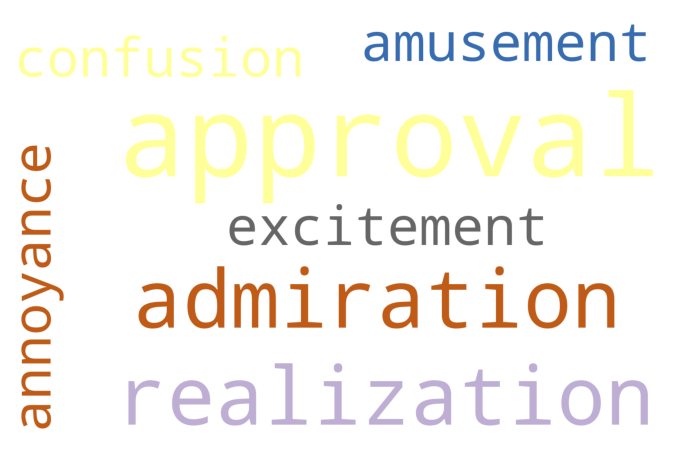

In [79]:
#문장의 핵심감정을 워드크라우드로 표현(큰 글자가 가장 빈도수가 많이 나온 분석결과다)

wordcloud = WordCloud(background_color='white',
                      colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

=============================================================================================

## 입력문장의 핵심주제를 추출해서 워드크라우드로 표현

In [81]:
import spacy
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load("en_core_web_lg")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [82]:
# 전처리
essay_input_corpus = str(input_text) #문장입력
essay_input_corpus = essay_input_corpus.lower()#소문자 변환

sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
total_words = len(word_tokenize(essay_input_corpus))# 총 단어수

split_sentences = []
for sentence in sentences:
    processed = re.sub("[^a-zA-Z]"," ", sentence)
    #words = processed.split()
    split_sentences.append(processed)

In [83]:
tokenized = nltk.word_tokenize(str(split_sentences))

In [84]:
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
nouns

["'bloomington",
 'city',
 'swathes',
 'corn',
 'envelop',
 'roads',
 'smell',
 'bbq',
 'smoke',
 'countryside',
 'summer',
 'norms',
 'force',
 'tradition',
 'expectation',
 'role',
 'filipino',
 'debussy',
 'piano',
 'festival',
 'philosophy',
 'i',
 'demand',
 'triplet',
 'groove',
 'intricacies',
 'chordal',
 'harmony',
 'years',
 'piano',
 'i',
 'music',
 's',
 'novelty',
 'guitar',
 'i',
 'methods',
 'solos',
 'greats',
 'experiment',
 'approaches',
 'sound',
 'i',
 'route',
 'freedom',
 'path',
 'i',
 'i',
 'expectations',
 'way',
 'way',
 'desires',
 'trail',
 'i',
 'interlochen',
 'arts',
 'summer',
 'year',
 'environment',
 'growth',
 'i',
 'people',
 'kinds',
 'art',
 'regard',
 'ideas',
 'art',
 'opportunity',
 'sound',
 'limits',
 'tradition',
 'day',
 'camp',
 'i',
 'peer',
 'guitarist',
 'band',
 'filipino',
 'girl',
 'illinois',
 'moment',
 'endeavors',
 'jazz',
 'guitar',
 'effort',
 'i',
 'one',
 'one',
 'i',
 'someone',
 'background',
 'i',
 'slew',
 'differences',
 

In [86]:
count = Counter(nouns)
words = dict(count.most_common())
words

{'i': 27,
 'filipino': 3,
 'expectations': 3,
 'way': 3,
 'francesca': 3,
 'pressure': 3,
 'summer': 2,
 'tradition': 2,
 'expectation': 2,
 'piano': 2,
 's': 2,
 'guitar': 2,
 'sound': 2,
 'interlochen': 2,
 'environment': 2,
 'art': 2,
 'guitarist': 2,
 'jazz': 2,
 'one': 2,
 'someone': 2,
 'presence': 2,
 'comfort': 2,
 'warmth': 2,
 "'bloomington": 1,
 'city': 1,
 'swathes': 1,
 'corn': 1,
 'envelop': 1,
 'roads': 1,
 'smell': 1,
 'bbq': 1,
 'smoke': 1,
 'countryside': 1,
 'norms': 1,
 'force': 1,
 'role': 1,
 'debussy': 1,
 'festival': 1,
 'philosophy': 1,
 'demand': 1,
 'triplet': 1,
 'groove': 1,
 'intricacies': 1,
 'chordal': 1,
 'harmony': 1,
 'years': 1,
 'music': 1,
 'novelty': 1,
 'methods': 1,
 'solos': 1,
 'greats': 1,
 'experiment': 1,
 'approaches': 1,
 'route': 1,
 'freedom': 1,
 'path': 1,
 'desires': 1,
 'trail': 1,
 'arts': 1,
 'year': 1,
 'growth': 1,
 'people': 1,
 'kinds': 1,
 'regard': 1,
 'ideas': 1,
 'opportunity': 1,
 'limits': 1,
 'day': 1,
 'camp': 1,
 'pee

In [87]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

In [88]:
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

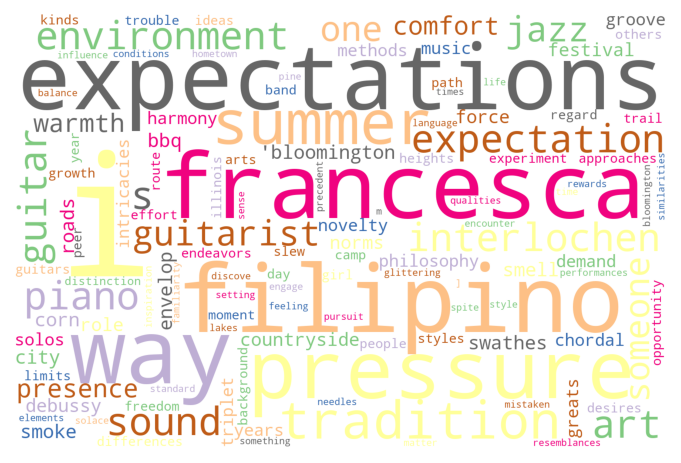

In [89]:
# 토픽을 워드크라우드로 표현

wordcloud = WordCloud(background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

=================================================================================================

## 우선 Prompt#2에 해당하는 부분을 분석해봤다. - end

해당 질문에 해당하는 답변에세이가 1~6번 질문중 어디에 해당하는지 분석해서 보여줌

1)질문 6개에 담겨있는 각각의 감정을 추출해본다.


documents = ["Some students have a background, identity, interest, or talent that is so meaningful they believe their application would be incomplete without it. If this sounds like you, then please share your story.",
            "The lessons we take from obstacles we encounter can be fundamental to later success. Recount a time when you faced a challenge, setback, or failure. How did it affect you, and what did you learn from the experience?",
            "Reflect on a time when you questioned or challenged a belief or idea. What prompted your thinking? What was the outcome?",
            "Describe a problem you've solved or a problem you'd like to solve. It can be an intellectual challenge, a research query, an ethical dilemma - anything that is of personal importance, no matter the scale. Explain its significance to you and what steps you took or could be taken to identify a solution.",
            "Discuss an accomplishment, event, or realization that sparked a period of personal growth and a new understanding of yourself or others.",
            "Describe a topic, idea, or concept you find so engaging that it makes you lose all track of time. Why does it captivate you? What or who do you turn to when you want to learn more? ",
            "Share an essay on any topic of your choice. It can be one you've already written, one that responds to a different prompt, or one of your own design."]


In [90]:
question_one_to_six = ["Some students have a background, identity, interest, or talent that is so meaningful they believe their application would be incomplete without it. If this sounds like you, then please share your story.",
            "The lessons we take from obstacles we encounter can be fundamental to later success. Recount a time when you faced a challenge, setback, or failure. How did it affect you, and what did you learn from the experience?",
            "Reflect on a time when you questioned or challenged a belief or idea. What prompted your thinking? What was the outcome?",
            "Describe a problem you've solved or a problem you'd like to solve. It can be an intellectual challenge, a research query, an ethical dilemma - anything that is of personal importance, no matter the scale. Explain its significance to you and what steps you took or could be taken to identify a solution.",
            "Discuss an accomplishment, event, or realization that sparked a period of personal growth and a new understanding of yourself or others.",
            "Describe a topic, idea, or concept you find so engaging that it makes you lose all track of time. Why does it captivate you? What or who do you turn to when you want to learn more? "
            ]

In [91]:
question_six = ["Share an essay on any topic of your choice. It can be one you've already written, one that responds to a different prompt, or one of your own design."]

In [92]:
#question one to six에 담겨있는 각각의 감정을 분석해 보자

from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-ekman")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-ekman")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

#데이터 전처리 
def cleaning(datas):

    fin_datas = []

    for data in datas:
        # 영문자 이외 문자는 공백으로 변환
        only_english = re.sub('[^a-zA-Z]', ' ', data)
    
        # 데이터를 리스트에 추가 
        fin_datas.append(only_english)

    return fin_datas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
def ai_emotion_analysis(input_text):
    # . 로 구분하여 리스트로 변환
    re_text = input_text.split(".")

    texts = cleaning(re_text)
    re_emot =  goemotions(texts)
    df = pd.DataFrame(re_emot)

    #결과물을 다시 감정유형별 비율로 계산하여 새로운 데이터프레임을 만들자!
    result_emotion = df['labels'].value_counts(normalize=True, sort=True, ascending=False, dropna=True) #문장 전체에서 각 값의 상대적 비율을 게산
    print (result_emotion)
    return result_emotion

In [95]:
question_emotion_list = []
for i in question_one_to_six:
    re_ques = ai_emotion_analysis(i)
    print("=============================")
    question_emotion_list.append(re_ques)


[neutral]         0.666667
[joy, neutral]    0.333333
Name: labels, dtype: float64
[joy, neutral]    0.333333
[neutral]         0.333333
[surprise]        0.333333
Name: labels, dtype: float64
[neutral]              0.5
[neutral, surprise]    0.5
Name: labels, dtype: float64
[neutral]    0.75
[joy]        0.25
Name: labels, dtype: float64
[neutral]    1.0
Name: labels, dtype: float64
[neutral]     0.5
[surprise]    0.5
Name: labels, dtype: float64


In [96]:
#질문 6개에 대한 주 감정 추출
question_emotion_list

[[neutral]         0.666667
 [joy, neutral]    0.333333
 Name: labels, dtype: float64,
 [joy, neutral]    0.333333
 [neutral]         0.333333
 [surprise]        0.333333
 Name: labels, dtype: float64,
 [neutral]              0.5
 [neutral, surprise]    0.5
 Name: labels, dtype: float64,
 [neutral]    0.75
 [joy]        0.25
 Name: labels, dtype: float64,
 [neutral]    1.0
 Name: labels, dtype: float64,
 [neutral]     0.5
 [surprise]    0.5
 Name: labels, dtype: float64]

## 입력 에세이의 감정을 분석해보자

In [97]:
#question one to six에 담겨있는 각각의 감정을 분석해 보자

from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-ekman")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-ekman")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

#데이터 전처리 
def cleaning(datas):

    fin_datas = []

    for data in datas:
        # 영문자 이외 문자는 공백으로 변환
        only_english = re.sub('[^a-zA-Z]', ' ', data)
    
        # 데이터를 리스트에 추가 
        fin_datas.append(only_english)

    return fin_datas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
#데이터 전처리 
def cleaning(datas):
    # . 로 구분하여 리스트로 변환
    re_text = datas.split(".")
    
    fin_datas = []

    for data in re_text:
        # 영문자 이외 문자는 공백으로 변환
        only_english = re.sub('[^a-zA-Z]', ' ', data)
    
        # 데이터를 리스트에 추가 
        fin_datas.append(only_english)

    return fin_datas

In [99]:
texts = cleaning(input_text)
re_emot =  goemotions(texts)

In [100]:
re_emot

[{'labels': ['joy'], 'scores': [0.9960813]},
 {'labels': ['disgust', 'fear'], 'scores': [0.85983986, 0.5620006]},
 {'labels': ['neutral'], 'scores': [0.99947864]},
 {'labels': ['joy'], 'scores': [0.9907286]},
 {'labels': ['joy', 'neutral'], 'scores': [0.77981836, 0.94868505]},
 {'labels': ['joy', 'neutral'], 'scores': [0.9936976, 0.34850067]},
 {'labels': ['joy'], 'scores': [0.9991466]},
 {'labels': ['surprise'], 'scores': [0.99839324]},
 {'labels': ['joy'], 'scores': [0.9326566]},
 {'labels': ['joy'], 'scores': [0.99941385]},
 {'labels': ['neutral'], 'scores': [0.99930704]},
 {'labels': ['neutral'], 'scores': [0.9996171]},
 {'labels': ['neutral', 'surprise'], 'scores': [0.92685086, 0.96787584]},
 {'labels': ['neutral'], 'scores': [0.99940586]},
 {'labels': ['anger'], 'scores': [0.9985833]},
 {'labels': ['neutral'], 'scores': [0.99884546]},
 {'labels': ['joy'], 'scores': [0.9990632]},
 {'labels': ['joy'], 'scores': [0.99846435]},
 {'labels': ['joy', 'neutral'], 'scores': [0.97298175, 0

In [101]:
emo_all = []
for list_val in range(0, len(re_emot)):
    #print(emo_re[list_val]['labels'],emo_re[list_val]['scores'])
    #mo_all.append((emo_re[list_val]['labels'],emo_re[list_val]['scores'])) #KEY, VALUE만 추출하여 리스트로 저장
    #emo_all.append(emo_re[list_val]['scores'])
    emo_all.append((re_emot [list_val]['labels']))
    
emo_all

[['joy'],
 ['disgust', 'fear'],
 ['neutral'],
 ['joy'],
 ['joy', 'neutral'],
 ['joy', 'neutral'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['neutral'],
 ['neutral', 'surprise'],
 ['neutral'],
 ['anger'],
 ['neutral'],
 ['joy'],
 ['joy'],
 ['joy', 'neutral'],
 ['joy', 'neutral'],
 ['joy', 'neutral'],
 ['neutral'],
 ['joy'],
 ['joy']]

In [102]:
from pandas.core.common import flatten #이중리스틀 FLATTEN
flat_list = list(flatten(emo_all))
flat_list

['joy',
 'disgust',
 'fear',
 'neutral',
 'joy',
 'joy',
 'neutral',
 'joy',
 'neutral',
 'joy',
 'surprise',
 'joy',
 'joy',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'anger',
 'neutral',
 'joy',
 'joy',
 'joy',
 'neutral',
 'joy',
 'neutral',
 'joy',
 'neutral',
 'neutral',
 'joy',
 'joy']

## 입력한 문장에 담겨있는 핵심 감성들 출력

In [103]:
count_ = Counter(flat_list)
words_ = dict(count_.most_common())
words_

{'joy': 14, 'neutral': 12, 'surprise': 2, 'disgust': 1, 'fear': 1, 'anger': 1}

In [104]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

In [105]:
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

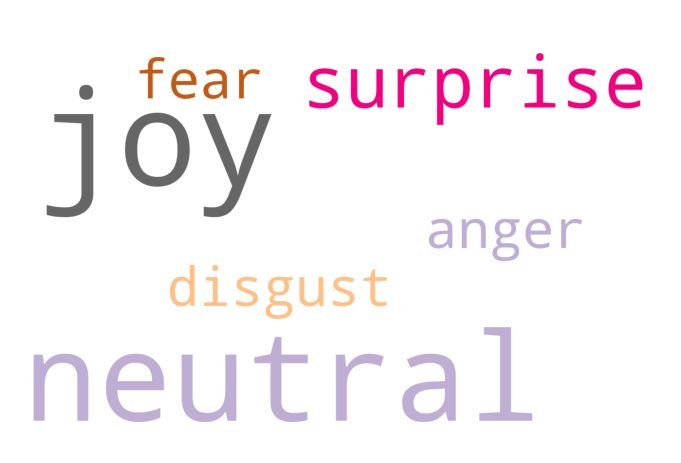

In [106]:
# 입력에세이에 포함된 감정을 워드크라우드로 표현

wordcloud_ = WordCloud(background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words_)

plt.imshow(wordcloud_)
plt.axis('off')
plt.show()

## 선택한 질문과 얼마나 연관성있는 답(입력에세이)를 했는지 분석해준다.

In [46]:
from gensim import corpora, models, similarities

#선택한 질문과 비교해서 결과가 0.9 이상 결과가 나오는지 확인, 적합한 답변을 했거나 적합한 답변을 하지 않았다는 결과 도출
#선택한 결과 입력
#결과비교
#결과 도출

#def theme_anaysis(text_input):
#질문 7개
def qanda_analysis(input_text):
    
    documents = ["Some students have a background, identity, interest, or talent that is so meaningful they believe their application would be incomplete without it. If this sounds like you, then please share your story.",
                "The lessons we take from obstacles we encounter can be fundamental to later success. Recount a time when you faced a challenge, setback, or failure. How did it affect you, and what did you learn from the experience?",
                "Reflect on a time when you questioned or challenged a belief or idea. What prompted your thinking? What was the outcome?",
                "Describe a problem you've solved or a problem you'd like to solve. It can be an intellectual challenge, a research query, an ethical dilemma - anything that is of personal importance, no matter the scale. Explain its significance to you and what steps you took or could be taken to identify a solution.",
                "Discuss an accomplishment, event, or realization that sparked a period of personal growth and a new understanding of yourself or others.",
                "Describe a topic, idea, or concept you find so engaging that it makes you lose all track of time. Why does it captivate you? What or who do you turn to when you want to learn more? ",
                "Share an essay on any topic of your choice. It can be one you've already written, one that responds to a different prompt, or one of your own design."]


  
    # remove common words and tokenize them
    stoplist = set('for a of the and to in'.split())

    texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]

    # remove words those appear only once
    all_tokens = sum(texts, [])

    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) ==1)
    texts = [[word for word in text if word not in tokens_once]
            for text in texts]
    dictionary = corpora.Dictionary(texts)

    dictionary.save('deerwester.dict')  # save as binary file at the dictionary at local directory
    dictionary.save_as_text('deerwester_text.dict')  # save as text file at the local directory



    #input answer
    text_input = input_text #문장입력....
    #text_input = """I inhale deeply and blow harder than I thought possible, pushing the tiny ember from its resting place on the candle out into the air. The room erupts around me, and 'Happy Birthday!' cheers echo through the halls. It's time to make a wish. In my mind, that new Limited Edition Deluxe Ben 10 watch will soon be mine. My parents and the aunties and uncles around me attempt to point me in a different direction. 'Wish that you get to go to the temple every day when you're older! Wish that you memorize all your Sanskrit texts before you turn 6! Wish that you can live in India after college!' My ears listen, but my mind tunes them out, as nothing could possibly compare to that toy watch! What I never realized on my third birthday is that those wishes quietly tell the story of how my family hopes my life will play out. In this version of my life, there wasn't much room for change, personal growth, or 'rocking the boat.' A vital aspect of my family's cultural background is their focus on accepting things as they are. Growing up, I was discouraged from questioning others or asking questions that didn't have definitive yes or no answers. If I innocently asked my grandma why she expected me to touch her feet, my dad would grab my hand in a sudden swoop, look me sternly in the eye, and tell me not to disrespect her like that again. At home, if I mentioned that I had tried eggs for breakfast at a friend's house, I'd be looked at like I had just committed a felony for eating what my parents considered meat. If I asked the priest at the temple why he had asked an Indian man and his white wife to leave, I'd be met with a condescending glare and told that I should also leave for asking such questions.In direct contrast, my curiosity was invited and encouraged at school. After an environmental science lesson, I stayed for a few minutes after class to ask my 4th-grade science teacher with wide eyes how it was possible that Niagara Falls doesn't run out of flowing water. Instead of scolding me for asking her a 'dumb question,' she smiled and explained the intricacy of the water cycle. Now, if a teacher mentions that we'll learn about why a certain proof or idea works only in a future class, I'll stay after to ask more or pour through an advanced textbook to try to understand it. While my perspective was widening at school, the receptiveness to raising complex questions at home was diminishing. After earning my driver's license, I registered as an organ donor. My small checkmark on a piece of paper led to an intense clash between my and my parents' moral platform. I wanted to ensure that I positively contributed to society, while my parents believed that organ donation was an unfamiliar and unnecessary cultural taboo. I would often ask for clarity or for reasons that supported their ideologies. Their response would usually entail feeling a deep, visceral sense that traditions must be followed exactly as taught, without objection. Told in one language to keep asking questions and in another to ask only the right ones, I chose exploring questions that don't have answers, rather than accepting answers that don't get questioned. When it comes to the maze of learning, even when I take a wrong turn and encounter roadblocks that are meant to stop me, I've learned to climb over them and keep moving forward. My curiosity strengthens with each hurdle and has expanded into a pure love of learning new things. I've become someone who seeks to understand things at a fundamental level and who finds excitement in taking on big questions that have yet to be solved. I'm no longer afraid to rock the boat. "},{"index":1,"personal_essay":"Ever since I first held a small foam Spiderman basketball in my tiny hands and watched my idol Kobe Bryant hit every three-pointer he attempted, I've wanted to understand and replicate his flawless jump shot. As my math education progressed in school, I began to realize I had the tools to create a perfect shot formula. After learning about variables for the first time in 5th grade Algebra, I began to treat each aspect of Kobe's jump shot as a different variable, each combination of variables resulting in a unique solution. While in 7th-grade geometry, I graphed the arc of his shot, and after learning about quadratic equations in 8th grade, I expressed his shot as a parabolic function that would ensure a swish when shooting from any spot. After calculus lessons in 10th and 11th grade, I was excited to finally solve for the perfect velocity and acceleration needed on my release. At Brown, I hope to explore this intellectual pursuit through a different lens. What if I could maximize the odds of making shots if I understood the science behind one's mental mindset and focus through CLPS 500: Perception and Action? Or use astrophysics to account for drag and gravitational force anywhere in the universe? Or use data science to break down the analytics of the NBA's best shooters? Through the Open Curriculum, I see myself not only becoming a more complete learner, but also a more complete thinker, applying a flexible mindset to any problem I encounter. Brown's Open Curriculum allows students to explore broadly while also diving deeply into their academic pursuits. Tell us about an academic interest (or interests) that excites you, and how you might use the Open Curriculum to pursue it. I've been playing the Mridangam since I was five years old. It's a simple instrument: A wood barrel covered on two ends by goatskin with leather straps surrounding the hull. This instrument serves as a connection between me and one of the most beautiful aspects of my culture: Carnatic music. As a young child, I'd be taken to the temple every weekend for three-hour-long Carnatic music concerts, where the most accomplished teenagers and young adults in our local Indian community would perform. I would watch in awe as the mridangists' hands moved gracefully, flowing across the goatskin as if they weren't making contact, while simultaneously producing sharp rhythmic patterns that never failed to fall on the beat. Hoping to be like these idols on the stage, I trained intensely with my teacher, a strict man who taught me that the simple drum I was playing had thousands of years of culture behind it. Building up from simple strokes, I realized that the finger speed I'd had been awestruck by wasn't some magical talent, it was instead a science perfected by repeated practice."""

    new_vec = dictionary.doc2bow(text_input.lower().split()) # return "word-ID : Frequency of appearance""
    corpus = [dictionary.doc2bow(text) for text in texts]
    corpora.MmCorpus.serialize('deerwester.mm', corpus) # save corpus at local directory
    corpus = corpora.MmCorpus('deerwester.mm') # try to load the saved corpus from local
    dictionary = corpora.Dictionary.load('deerwester.dict') # try to load saved dic.from local
    tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
    corpus_tfidf = tfidf[corpus]  # map corpus object into tfidf space
    lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize LSI
    corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus
    topic = lsi.print_topics(2)
    lsi.save('model.lsi')  # save output model at local directory
    lsi = models.LsiModel.load('model.lsi') # try to load above saved model

    doc = text_input

    vec_bow = dictionary.doc2bow(doc.lower().split())  # put newly obtained document to existing dictionary object
    vec_lsi = lsi[vec_bow] # convert new document (henceforth, call it "query") to LSI space
    index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and indexize it
    index.save('deerwester.index') # save index object at local directory
    index = similarities.MatrixSimilarity.load('deerwester.index')
    sims = index[vec_lsi] # calculate degree of similarity of the query to existing corpus

    print(list(enumerate(sims))) # output (document_number , document similarity)

    sims = sorted(enumerate(sims), key=lambda item: -item[1])  # sort output object as per similarity ( largest similarity document comes first )
    print(sims) # 가장 질문에 대한 답변이 적합한 순서대로 출력
    
    # result_sims = []
    
    quada_dic = {}
    
    for temp in sims : 
        
        quada_dic[temp[0]] = round(float(temp[1]),3)
        
        # result_sims.append([temp[0],round(float(temp[1]),3)])

    return quada_dic


In [47]:
dict_qna = qanda_analysis(input_text)
dict_qna # 가장 일치 확률이 높은 값이 맨 앞에 위치한다.

[(0, 0.9968797), (1, 0.75126326), (2, 0.72774315), (3, 0.9291306), (4, 0.54403174), (5, 0.85720384), (6, 0.9853189)]
[(0, 0.9968797), (6, 0.9853189), (3, 0.9291306), (5, 0.85720384), (1, 0.75126326), (2, 0.72774315), (4, 0.54403174)]


{0: 0.997, 6: 0.985, 3: 0.929, 5: 0.857, 1: 0.751, 2: 0.728, 4: 0.544}

In [113]:
# 가장 확률이 높은 값을 가져오기 >>>> 딕셔너리에서 벨류갑이 가장 큰 Key값 가쳐오기. 이것이 적합한 질문이다.
def f1(x):
    return dict_qna[x]

key_max = max(dict_qna.keys(), key=f1)
key_max #0 ~ 6 중 하나의 숫자가 나오면 해당 숫자의 질문이 답변(입력에세이)과 가장 적합한 질문 매칭이라는 의미임

0

In [124]:
match_list = dict_qna.keys()
match_list

dict_keys([0, 6, 3, 5, 1, 2, 4])

In [134]:
match_top_three = []
k = 0
for m_item in match_list:
    k = k + 1
    if k <4:
        pass
        print(k)
        match_top_three.append(m_item)
    else:
        pass
    
match_top_three
    

1
2
3


[0, 6, 3]

In [162]:
# 웹에서 입력된 정보가 i 로 전달되면, 다음 조건문에서 비교하게 됨
i = 6

In [163]:
#1~6중 하나를 입력받았을 경우, 분석결과가 첫번재 결과물과 일치하면 '매칭', 아니면 '적합한 답변이 아닌것 같음' 이라고 출력

# 질문입력   i   <<<<<<<<<<<<<<<<<<<<<<<<<<< 입력을 받아야 함

for mat_item in match_top_three: 
    # 답변 입력 후 분석결과는 keu_max 로 출력됨
    if i == mat_item: # 답변이 질문선택값과 일치하면!
        print ("질문에 해당하는 적합한 답변이오. MATCH!")
        
    else:
        print ("질문에 대한 적합한 답변이 아니오. NOT SURE!")

    

질문에 대한 적합한 답변이 아니오. NOT SURE!
질문에 해당하는 적합한 답변이오. MATCH!
질문에 대한 적합한 답변이 아니오. NOT SURE!
